## SQL data

The purpose of this notebook is to use SQL commands from the python command  through the im.db database

In [1]:
#same initial imports
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from pandasql import sqldf
from matplotlib.pyplot import figure
pd.set_option('display.float_format', '{:.2f}'.format)

#### Data Cleaning and Filter: IMDB

In [2]:
ConnectiontoDF = sqlite3.connect("im.db") 
cur = ConnectiontoDF.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names
#we know we want movie basics and movie ratings at the minimum, so lets get that information

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

The following cells will be used to practice SQl commands, modify with pandas if necessary and visualize.

SQL Command 1: Merge movie basics and ratings based on the id of the movie and sort it by descending order of movie ratings

In [3]:

SQL_1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY movie_ratings.averagerating DESC
;
"""

SQL_table1 = pd.read_sql(SQL_1, ConnectiontoDF)
SQL_table1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.00,Documentary,tt10176328,10.00,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.00,"Comedy,Drama",tt10378660,10.00,5
2,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.00,"Crime,Documentary",tt1770682,10.00,5
3,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.00,Documentary,tt2632430,10.00,5
4,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.00,Documentary,tt4109192,10.00,6
...,...,...,...,...,...,...,...,...,...
73851,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.00,Drama,tt8446392,1.00,5
73852,tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.00,Horror,tt8654080,1.00,21
73853,tt9005484,Roofied: The Lethal Dose,Roofied: The Lethal Dose,2019,NaN,Drama,tt9005484,1.00,112
73854,tt9352262,The Defender,The Defender,2018,88.00,Drama,tt9352262,1.00,16


Clean

In [4]:
#first we want to pass the following function just so we have a more accurate representation of averagerating
SQL_table1['popularity'] = SQL_table1['averagerating'].astype(float) * SQL_table1['numvotes'].astype(int)
SQL_table1


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,popularity
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.00,Documentary,tt10176328,10.00,5,50.00
1,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.00,"Comedy,Drama",tt10378660,10.00,5,50.00
2,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.00,"Crime,Documentary",tt1770682,10.00,5,50.00
3,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.00,Documentary,tt2632430,10.00,5,50.00
4,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.00,Documentary,tt4109192,10.00,6,60.00
...,...,...,...,...,...,...,...,...,...,...
73851,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.00,Drama,tt8446392,1.00,5,5.00
73852,tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.00,Horror,tt8654080,1.00,21,21.00
73853,tt9005484,Roofied: The Lethal Dose,Roofied: The Lethal Dose,2019,NaN,Drama,tt9005484,1.00,112,112.00
73854,tt9352262,The Defender,The Defender,2018,88.00,Drama,tt9352262,1.00,16,16.00


In [5]:
#now we want to analyze the relationship between variables against popularity
delete= SQL_table1.copy()

In [6]:
assert delete.runtime_minutes.isna().sum() == 0 

AssertionError: 

In [7]:
#if we take the mean from each year then maybe we can see if theres a correlation 
assert delete.start_year.isna().sum() == 0#.astype(int).fillna(0)
delete.runtime_minutes =delete.runtime_minutes.dropna()
 #.astype(int).fillna(0)


Charts
1: 10 most popular movies

In [10]:
#sort by ascending popualarity
popularity_chart= delete.sort_values(by =['popularity'], ascending = False)

<AxesSubplot:ylabel='original_title'>

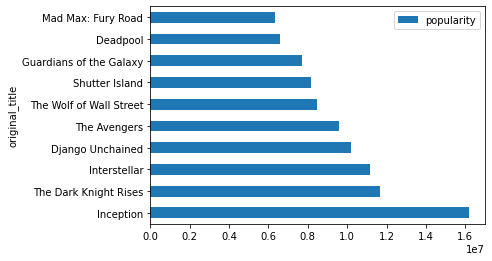

In [15]:
popularity_chart.head(10).plot(x = 'original_title', y= 'popularity' , kind = 'barh')

As per the main notebook we can clearly see that the top ten movies in terms of popularity do not correlate to the ROI from our initial graph of top 10 movies shown earlier. 

SQL Command 2: Merge principals and persons to find roles 

In [33]:
#lets link ('known_for',), ('movie_akas',),('movie_ratings',),('persons',),('principals',),('writers',)]
Whatisinhere1 = """
SELECT *
FROM persons
JOIN principals
ON persons.person_id = principals.person_id
;
"""
person = pd.read_sql(Whatisinhere1, ConnectiontoDF)
person

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,ordering,person_id,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt2398241,9,nm0061671,producer,producer,None
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt0433397,7,nm0061865,composer,None,None
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt1681372,8,nm0061865,composer,None,None
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2281215,7,nm0061865,composer,None,None
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt2387710,8,nm0061865,composer,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1027907,nm9990381,Susan Grobes,NaN,NaN,actress,tt6527982,2,nm9990381,actress,None,"[""Cheryl"",""Gypsy""]"
1027908,nm9990690,Joo Yeon So,NaN,NaN,actress,tt8737130,4,nm9990690,actress,None,None
1027909,nm9991320,Madeline Smith,NaN,NaN,actress,tt8734436,3,nm9991320,actress,None,"[""Anna""]"
1027910,nm9991786,Michelle Modigliani,NaN,NaN,producer,tt8739240,9,nm9991786,producer,producer,None


In [ ]:
#use this merge to combine with delete 

In [35]:
popularity_chart

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,popularity
1860,tt1375666,Inception,Inception,2010,148.00,"Action,Adventure,Sci-Fi",tt1375666,8.80,1841066,16201380.80
4372,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.00,"Action,Thriller",tt1345836,8.40,1387769,11657259.60
2958,tt0816692,Interstellar,Interstellar,2014,169.00,"Adventure,Drama,Sci-Fi",tt0816692,8.60,1299334,11174272.40
4461,tt1853728,Django Unchained,Django Unchained,2012,165.00,"Drama,Western",tt1853728,8.40,1211405,10175802.00
7249,tt0848228,The Avengers,The Avengers,2012,143.00,"Action,Adventure,Sci-Fi",tt0848228,8.10,1183655,9587605.50
...,...,...,...,...,...,...,...,...,...,...
73826,tt5452328,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,2016,61.00,Horror,tt5452328,1.00,6,6.00
73850,tt8426154,Pup Scouts,Pup Scouts,2018,72.00,Animation,tt8426154,1.00,5,5.00
73851,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.00,Drama,tt8446392,1.00,5,5.00
73807,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,2012,85.00,Comedy,tt2447822,1.00,5,5.00


In [24]:
#lets link ('known_for',), ('movie_akas',),('movie_ratings',),('persons',),('principals',),('writers',)]
Whatisinhere2 = """
SELECT *
FROM principals
;
"""

principals = pd.read_sql(Whatisinhere2, ConnectiontoDF)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None
